# Título do notebook

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Aqui é a primeira seção

In [73]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [74]:
df = pd.read_csv('../../data/rafaelDB.csv')

In [75]:
# Definindo o Array dos Vetores
vetorClusters = np.zeros(df.shape[1])

##### Plot dos dados

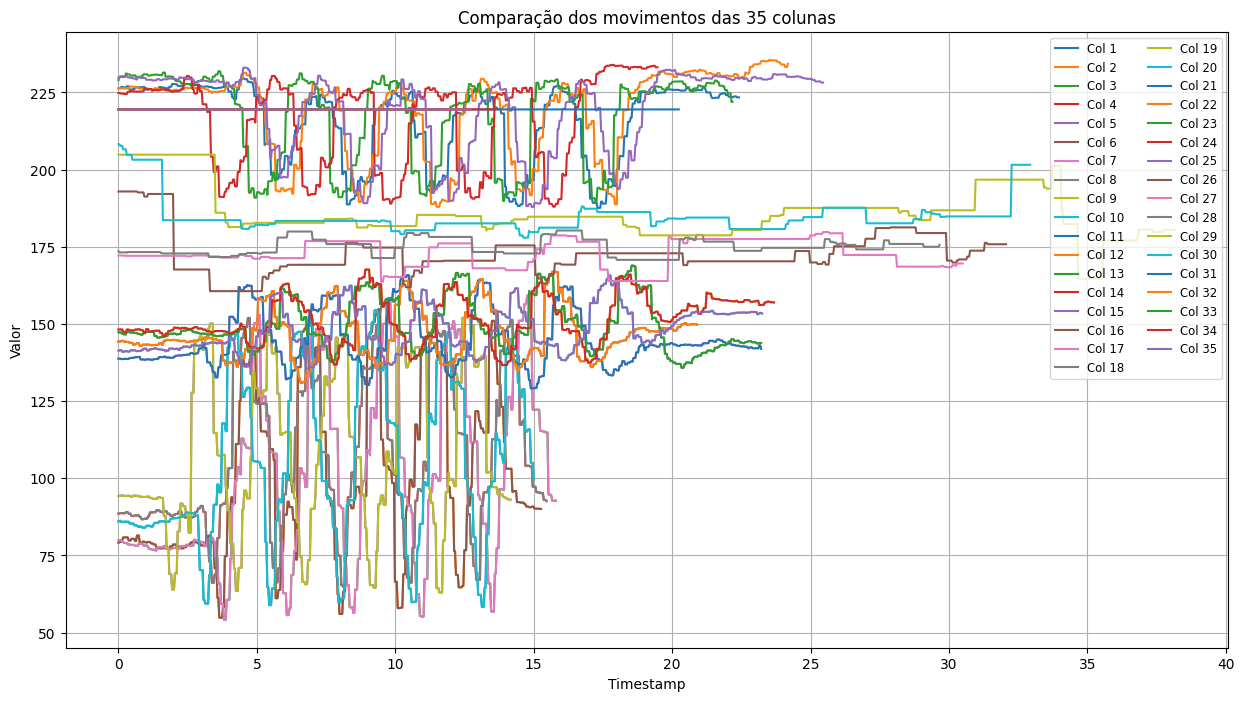

In [76]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

#### Normalização dos dados 

In [77]:

# Separa timestamp e sensores
timestamp = df.iloc[:, 0]
dados = df.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())


Menor tamanho válido: 344
(344, 36)
   timestamp   Vol1Ex1   Vol1Ex2   Vol1Ex3   Vol1Ex4   Vol1Ex5   Vol2Ex1  \
0     0.0000  86.05160  79.04637  79.92158  88.55168  94.18597  144.2986   
1     0.0334  86.05160  79.42403  79.92158  88.55168  94.36861  144.2986   
2     0.0668  86.24536  79.42403  79.92158  88.72372  94.36861  144.2986   
3     0.1002  85.88944  79.42403  79.92158  88.72372  94.36861  144.4738   
4     0.1336  85.88944  79.89925  79.41667  88.72372  94.40106  144.5396   

    Vol2Ex2   Vol2Ex3   Vol2Ex4  ...   Vol6Ex1   Vol6Ex2   Vol6Ex3   Vol6Ex4  \
0  138.7671  147.3392  148.2097  ...  192.9248  172.1902  173.6004  204.8451   
1  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
2  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
3  138.6201  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
4  138.6201  146.8200  148.2097  ...  192.9248  172.1767  173.1956  204.8451   

    Vol6Ex5   Vol7Ex1   Vo

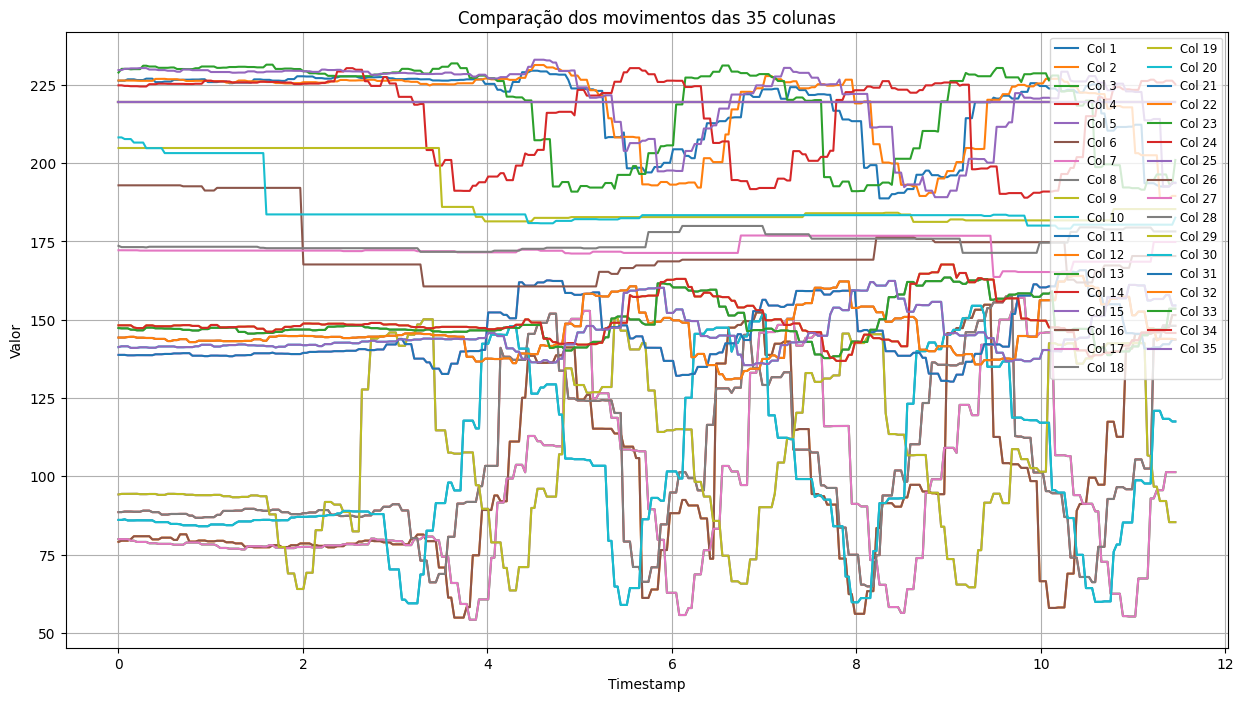

In [78]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df_final.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df_final.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

##### Modelo 

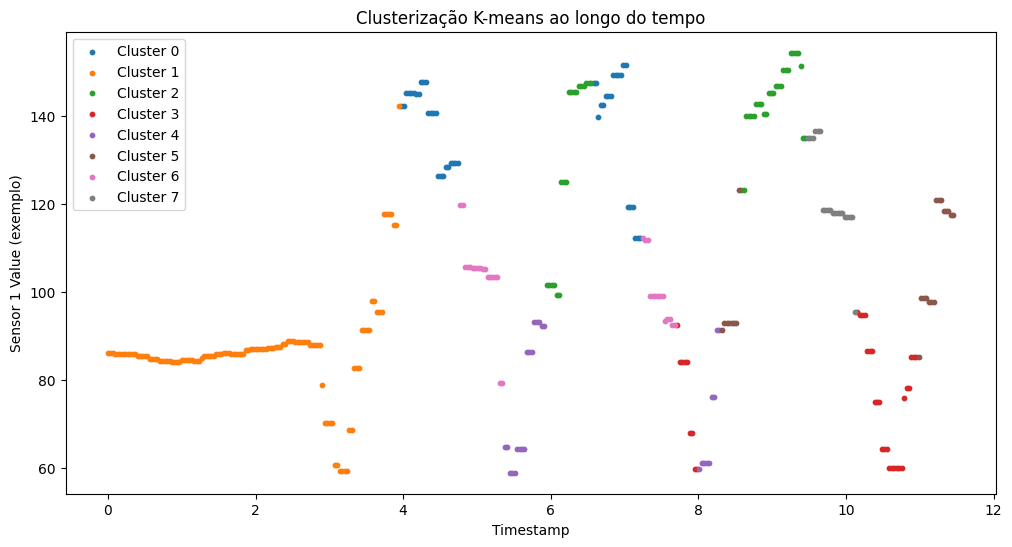

In [79]:
# clusterização dos dados

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df_final

# Separar features (excluindo a coluna timestamp que é a primeira)
X = df.iloc[:, 1:].values  # matriz de shape (n_samples, 35)


# Definir número de clusters (exemplo: 3)
k = 8

# Aplicar K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar a coluna de cluster no DataFrame original para análise
df['cluster'] = clusters

# Visualizar clusters ao longo do tempo (timestamp)
plt.figure(figsize=(12,6))
for cluster_id in range(k):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_id}', s=10)

plt.xlabel('Timestamp')
plt.ylabel('Sensor 1 Value (exemplo)')
plt.title('Clusterização K-means ao longo do tempo')
plt.legend()
plt.show()


# Aqui é a segunda seção

In [80]:
...

Ellipsis

# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.